In [1]:
"""
PATRICK KIMATHI KARIUKI
Student ID: CS-DA02-25041
TASK : Assignment 7: Regression Models
DATE: 02,NOVEMBER 2025
"""

'\nPATRICK KIMATHI KARIUKI\nStudent ID: CS-DA02-25041\nTASK : Assignment 7: Regression Models\nDATE: 02,NOVEMBER 2025\n'

In [6]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import libraries for machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Import/load the data set from the local machine

In [3]:
#Import/load the data set from the local machine
from google.colab import files
uploaded = files.upload()


Saving homeprices.csv to homeprices.csv


In [7]:
#confrim that the files have been unploaded
import os
print(os.listdir())

['.config', 'homeprices.csv', 'Regression Datasets.zip', 'sample_data']


In [8]:
#Load my dataset to a DataFrame
homeprices_df = pd.read_csv('homeprices.csv')
homeprices_df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


# Explore the Dataset

 *Describe* its structure, and visualize it using scatter plots

In [9]:
#DISCOVER THE DATA STRUCTURE
homeprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [10]:
#display summary statistics
homeprices_df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


**Visualize** it using scatter plots

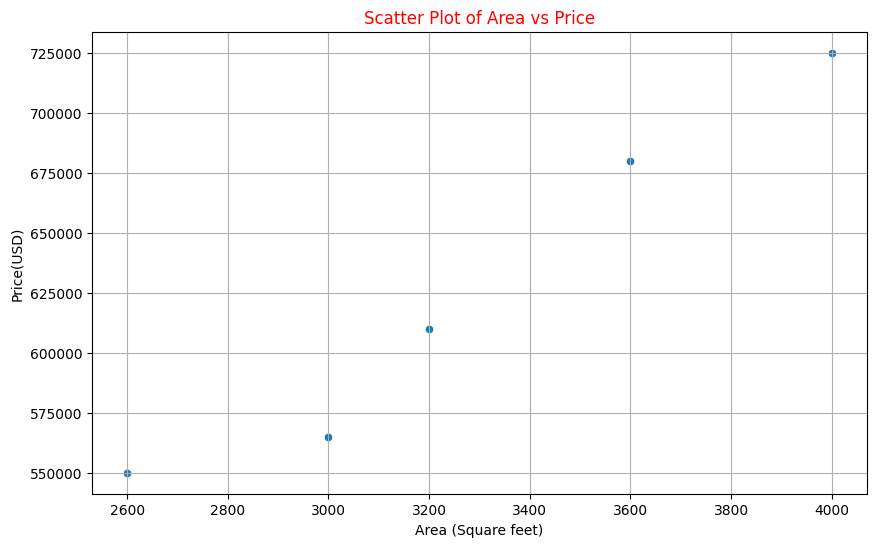

In [11]:
#Visualize the data using Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot( data=homeprices_df, x='area', y='price')
plt.title('Scatter Plot of Area vs Price', color='red')
plt.xlabel('Area (Square feet)')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.show()

# Prepare the Data

In [12]:
#check if there are missing values in the dataset
homeprices_df.isnull().sum()

,0
area,0
price,0


Split the dataset into training and test sets

In [16]:
#split the dataset into training and test sets
X = homeprices_df.drop('price', axis=1) # drop the target variable to remain with the features
y = homeprices_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #the tes-size is split  25% of the dataset meaning the train split is 75

In [14]:
#print the train split
print("X_Train", X_train)
print("Y_Traing(Price)\n", y_train)


X_Train    area
2  3200
0  2600
3  3600
Y_Traing(Price)
 2    610000
0    550000
3    680000
Name: price, dtype: int64


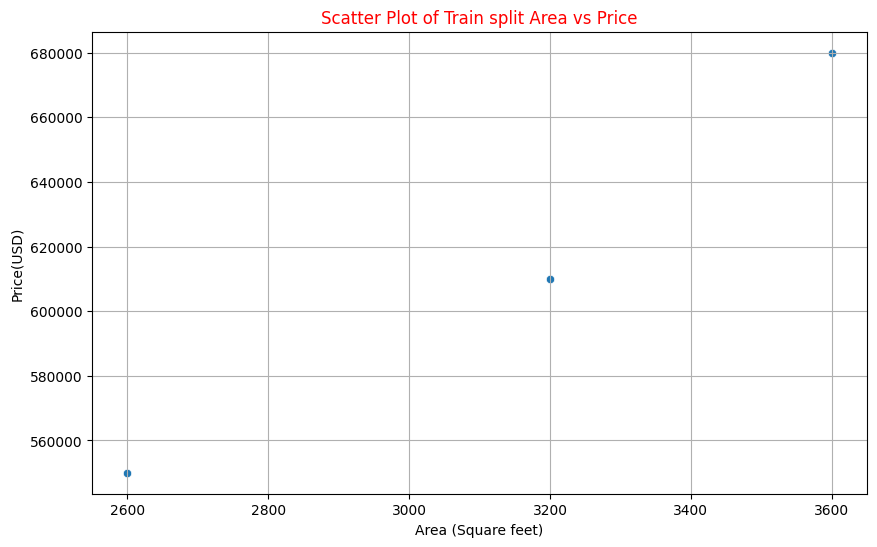

In [15]:
#Visualize the train set using scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train['area'], y=y_train)
plt.title('Scatter Plot of Train split Area vs Price', color='red')
plt.xlabel('Area (Square feet)')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.show()

In [ ]:
#Visualize the test split using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['area'], y=y_test)
plt.title('Scatter Plot of Test split Area vs Price', color='red')
plt.xlabel('Area (Square feet)')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.show()

In [17]:
#print the test split
print("X_Test(Area)", X_test)
print("Y_Test(Price)\n", y_test)

X_Test(Area)    area
1  3000
4  4000
Y_Test(Price)
 1    565000
4    725000
Name: price, dtype: int64


# Build the Model

**Use** Scikit-learn’s LinearRegression to fit the model on training data

In [19]:
#: Use Scikit-learn’s LinearRegression to fit the model on training data
model = LinearRegression()
model.fit(X_train, y_train) #fit the model

LinearRegression()

# Evaluate the Model: Use metrics like MAE, MSE, RMSE, and R² Score

In [20]:
#Evaluate the Model: Use metrics like MAE, MSE, RMSE, and R² Score
y_pred = model.predict(X_test) #predict
mse = mean_squared_error(y_test, y_pred) #mean squared error between the predicted and actual target value
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

Print the metrics **bold text**

In [21]:
#Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 490893351.800556
Root Mean Squared Error: 22156.113192537992
R-squared Score: 0.9232979137811631


The mean squared error (MSE) is a measure of the average squared difference between the predicted and actual target values in the Linear Regression model. It is commonly used as a performance metric to evaluate the accuracy of the model's predictions on the test set. A lower value of MSE indicates that the model has better predictive power, as it means that the predicted values are closer to the actual values. Therefore, the purpose of the mean squared error in the Linear Regression model is to assess the quality of the model's predictions and to determine if it needs to be further optimized.*italicised text*

The R2 value of 92% shows a good model fit

A high R-Squared value means that many data points are close to the linear regression function line.
A low R-Squared value means that the linear regression function line does not fit the data well.*italicised text*

The high R-Squared value of 0.92  means that many data points are close to the linear regression function line.
**bold text**

# Visualize the Results

 Plot the regression line against the actual **data**

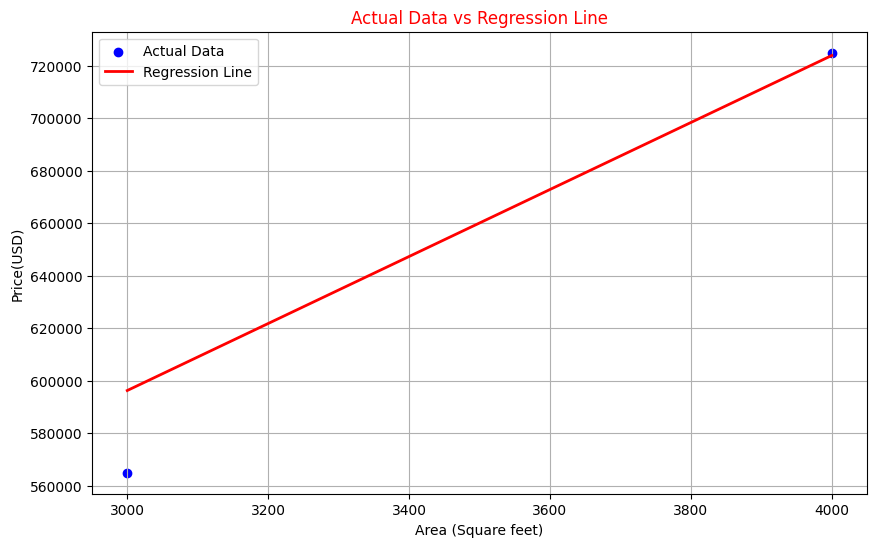

In [22]:
#Plot the regression line against the actual data
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Actual Data vs Regression Line', color='red')
plt.xlabel('Area (Square feet)')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

This simple Linear regression demonstrates that:

Price is positively correlated with area.

The model effectively captures the linear pattern in the given data.

However, since it’s based on only two data points, the model’s predictive reliability is limited — it would need more data to generalize well.

In [23]:
#download the csv file
homeprices_df.to_csv('homeprices.csv', index=False)

#download to a specific folder
from google.colab import files
files.download('homeprices.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>